In [1]:
import pandas as pd
import json
from pycocotools.coco import COCO
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
test_json_coco = COCO("/data/ephemeral/home/dataset/test.json")
img_ids = test_json_coco.getImgIds()
print(img_ids)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 2

In [3]:
result_json_path = '/data/ephemeral/home/project2/level2-objectdetection-cv-08/mmdetection/work_dirs/dino_best_tta.json'  # 추론 결과가 저장된 JSON 파일 경로
with open(result_json_path, 'r') as f:
    results = json.load(f)

In [4]:
prediction_strings = []
file_names = []

for img_id in img_ids:
    prediction_string = ''
    file_name = test_json_coco.loadImgs(img_id)[0]['file_name']
    
    # 해당 image_id에 해당하는 예측 결과 필터링
    predictions = [pred for pred in results if pred['image_id'] == img_id]
    # 각 예측 결과에 대해 bbox와 score 정보를 하나의 문자열로 합침
    for pred in predictions:
        category_id = pred['category_id']  # category_id가 1부터 시작하므로 0부터 시작하도록 조정
        bbox = pred['bbox']
        score = pred['score']

        x_min = bbox[0]
        y_min = bbox[1]
        x_max = bbox[2] + bbox[0] # x_min + width
        y_max = bbox[3] + bbox[1] # y_min + height
        
        # 좌상단 x, y와 우하단 x, y를 사용하는 방식으로 bbox 좌표 변환
        bbox_string = f"{category_id} {score} {x_min} {y_min} {x_max} {y_max} "
        prediction_string += bbox_string
    
    # 결과 리스트에 추가
    prediction_strings.append(prediction_string.strip())
    file_names.append(file_name)

# DataFrame 생성 후 CSV 파일로 저장
submission = pd.DataFrame({
    'PredictionString': prediction_strings,
    'image_id': file_names
})

In [5]:
submission.describe

<bound method NDFrame.describe of                                        PredictionString       image_id
0     7 0.7737413644790649 216.08926391601562 50.093...  test/0000.jpg
1     5 0.7221706509590149 129.36907958984375 0.0 49...  test/0001.jpg
2     1 0.6246978640556335 775.338134765625 425.6112...  test/0002.jpg
3     9 0.8600477576255798 144.6085205078125 261.924...  test/0003.jpg
4     1 0.816838264465332 195.08746337890625 253.094...  test/0004.jpg
...                                                 ...            ...
4866  0 0.8309144377708435 291.4541015625 345.302856...  test/4866.jpg
4867  3 0.8913285136222839 415.739501953125 319.0256...  test/4867.jpg
4868  7 0.878944456577301 118.0770263671875 448.8672...  test/4868.jpg
4869  0 0.7003816366195679 2.2723388671875 240.98901...  test/4869.jpg
4870  4 0.8664997220039368 373.13702392578125 205.31...  test/4870.jpg

[4871 rows x 2 columns]>

In [6]:
out_path = "/data/ephemeral/home/project2"
model_name = "dino_best_tta"

submission.to_csv(os.path.join(out_path , f'submission_{model_name}_voc.csv'), index=False)

In [7]:
result = submission.iloc[0]
result

PredictionString    7 0.7737413644790649 216.08926391601562 50.093...
image_id                                                test/0000.jpg
Name: 0, dtype: object

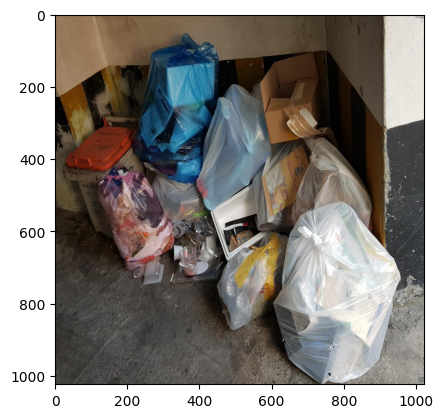

In [8]:
p_string = result["PredictionString"]
path = "/data/ephemeral/home/dataset/" + result["image_id"]
image = cv2.imread(path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

['7', '0.7737413644790649', '216.08926391601562', '50.09315490722656', '455.1001892089844', '477.01593017578125', '7', '0.7429472208023071', '450.3326416015625', '598.7423706054688', '648.1558837890625', '874.5302124023438', '7', '0.7346213459968567', '118.49769592285156', '420.9813232421875', '332.65179443359375', '713.4017333984375', '7', '0.7323771119117737', '388.11517333984375', '189.911376953125', '599.893310546875', '544.3955078125', '7', '0.7280204892158508', '602.5679931640625', '518.7196655273438', '954.63671875', '1023.0676879882812', '5', '0.6538971066474915', '243.65878295898438', '681.4346923828125', '300.7189025878906', '748.49462890625', '7', '0.6485463976860046', '556.9260864257812', '342.89471435546875', '710.4695434570312', '606.2176513671875', '7', '0.6159935593605042', '268.0948486328125', '424.9888916015625', '429.7896728515625', '594.771728515625', '1', '0.6044071316719055', '557.4813232421875', '103.4089584350586', '741.8280029296875', '353.1176452636719', '7', 

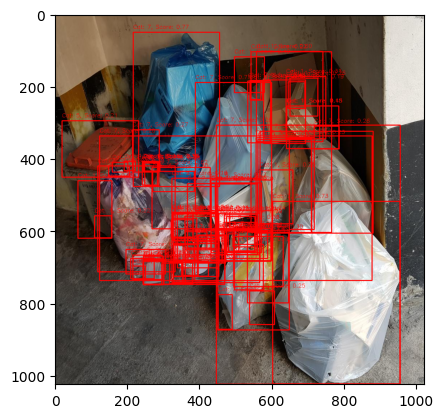

In [ ]:
predicted = p_string.strip().split()
print(predicted)

bboxes = []
for i in range(0, len(predicted), 6):
    category_id = int(predicted[i])
    score = float(predicted[i + 1])
    x_min = float(predicted[i + 2])
    y_min = float(predicted[i + 3])
    x_max = float(predicted[i + 4])
    y_max = float(predicted[i + 5])
    
    bboxes.append((category_id, score, x_min, y_min, x_max, y_max))

for bbox in bboxes:
    print(bbox)
    category_id, score, x_min, y_min, x_max, y_max = bbox
    cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)
    # 바운딩박스 위에 category와 score 표시
    cv2.putText(image, f'Cat: {category_id}, Score: {score:.2f}', 
                (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

plt.imshow(image)